# 2 csatornás képek

In [ ]:
#2 csatornás kép betöltése

import matplotlib.pyplot as plt
from skimage import io
import numpy as np


#load
path="data/single/JNK1B2_1.tif"
img = io.imread(path)
#load részeként: ellenőrzi, hogy a channelek milyen sorrendben vannak, és rendezi
if img.shape[0] <6:
    img = np.swapaxes(img, 0, 2)
    img = np.swapaxes(img, 0, 1)
if img.shape[1] <6:
    img = np.swapaxes(img, 1, 2)


#print
channels=img.shape[-1]

for i in range(channels):
    plt.subplot(1, channels, i+1)
    plt.imshow(img[:,:,i], cmap="gray") 
    plt.axis("off")
    
    
print(img.shape)

In [ ]:
#2 csatornás kép betöltése class segítségével 2 képre

from Classes import cellImageAnalysis as ca
import matplotlib.pyplot as plt
from skimage import io

img = ca.Image("data/single/JNK1B2_1.tif", ["Nuclei", "Plasma"])
img.load_image()
img.display_image()

# sejtkontúrok

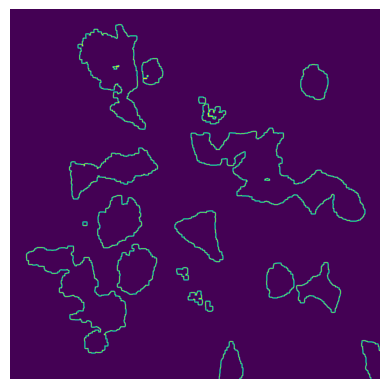

In [13]:
#példa a sejtek kontúrjának megtalálásához

import matplotlib.pyplot as plt
from skimage import io
import numpy as np
from Classes import cellImageAnalysis as ca
from skimage.morphology import erosion
from skimage.morphology import disk  # szükséges az erosion mértékéhez

path="data/single/JNK1B2_1.tif"

img = ca.Image(path, ["protein1", "protein2"])
img.load_image()
detector = ca.Detector(cell_channel=0)
labels = detector.detect_cells(img.image)

footprint = disk(5)
#footprint számadat megadja a membrán vastagságát

cellb=[[]]
#betesszük egy listába az adott sejtet
#kivonjuk belőle az erodált mását (true-fals miatt boolean operátor!)

for i in range(labels.max()):
    cellb[i]=labels==i
    cellb[i]= cellb[i]^erosion(labels==i,footprint)
    break

#a listákat numpy array-é alakítjuk
#shape varázslás
cellb=np.array(cellb)
cellb = np.swapaxes(cellb, 0, 2)
cellb = np.swapaxes(cellb, 0, 1)


plt.axis("off")
plt.imshow(cellb)

In [ ]:
#a probálkozások során kellett
#probléma vizualizálása a szétbontott sejtek kontúrjának megalkotása előtt

for i in range(labels.max()):
    plt.rcParams['figure.figsize'] = [8, 8]
    plt.subplot(5, labels.max()-24, i+1)
    plt.imshow(labels==i+1)
    plt.axis("off")

# 3 képből 1

In [ ]:
#3 képből egy, sajnos a külön csatornákat nem tudtam megcsinálni / nem látom át hogyan alakul ki a 3d array
#de a képek kifejezetten szépek, részletgazadok!

from Classes import cellImageAnalysis as ca        
     
#a=ca.XpressImage("data/230309","A04_s45")
a=ca.XpressImage("data/230309","A04_s47")
a.load_ximage()
a.display_ximage()

# misc

In [ ]:
#classok megértéséhez segédlet

class Animal:
    
    def __init__(self, birth_date):
        self.birth_date = birth_date
        self.position = 0
        
    def get_age(self):
        return 10
    
    def move(self):
        self.position += 1
        
class Cow(Animal):
    
    def __init__(self, birth_date, milk=None):
        super().__init__(birth_date)
    
    def moo(self):
        print("Moooooo")
        
    def get_age(self):
        return 3